In [1]:
# import other files
import sys

sys.path.append("..")

In [2]:
# fetch functions
from etl.fetch import *
from etl.main import *
# environment variables
from dotenv import load_dotenv
import os
# data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
# import seaborn as sns
from flask_oauthlib.client import OAuth

ModuleNotFoundError: No module named 'flask_oauthlib'

RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.

In [3]:
# load environment variables
load_dotenv()

personal_playlist_id = os.getenv("PERSONAL_PLAYLIST_ID")

token = get_token()

# personal playlist 
personal_playlist = get_playlist_tracks(token, personal_playlist_id)

# track features
track_ids = ','.join(personal_playlist.track_id.to_list())
track_features = get_track_features(token, track_ids)

# artist features
artist_ids = ','.join(personal_playlist.artist_id.to_list())
artist_features = get_artist_attribute(token, artist_ids)

2023-11-15 14:31:56 INFO Fetching token...
2023-11-15 14:31:56 INFO Fetching tracks...
2023-11-15 14:31:57 INFO Fetching track features...
2023-11-15 14:31:58 INFO Fetching artist(s)...


In [4]:
def missing_data_check(df):
    total = df.isnull().sum()
    pct = (total / df.isnull().count()) * 100
    # output metrics table
    result = pd.concat([total, pct], axis = 1, keys = ['Total', 'Percent'])
    # add dtypes to output
    types = [str(df[col].dtype) for col in df.columns]
    result["Types"] = types
    return result

missing_data_check(track_features)


,Total,Percent,Types
danceability,0,0.0,float64
energy,0,0.0,float64
key,0,0.0,int64
loudness,0,0.0,float64
mode,0,0.0,int64
speechiness,0,0.0,float64
acousticness,0,0.0,float64
instrumentalness,0,0.0,float64
liveness,0,0.0,float64
valence,0,0.0,float64


Checked to see if for any reason any of the tracks have missing audio features. This does not seem to be the case.

In [5]:
def missing_genres_check(df):
    df = artist_features
    df['is_missing_genre'] = df.genres.astype(bool)    
    total = df.is_missing_genre[df.is_missing_genre == False].count()
    pct = (total / df.is_missing_genre.count()) * 100
    result = pd.DataFrame({'Total':total, 'Percent':pct}, index=['is_missing_genre'])
    return result

missing_genres_check(artist_features)

,Total,Percent
is_missing_genre,17,12.781955


An interesting observation here is that genres are associated with an artist rather than a song. More importantly, we have that almost 13% of the artists in my personal playlist are missing genres. This might be because these artists are not as well known and so Spotify has yet to assign them a genre.

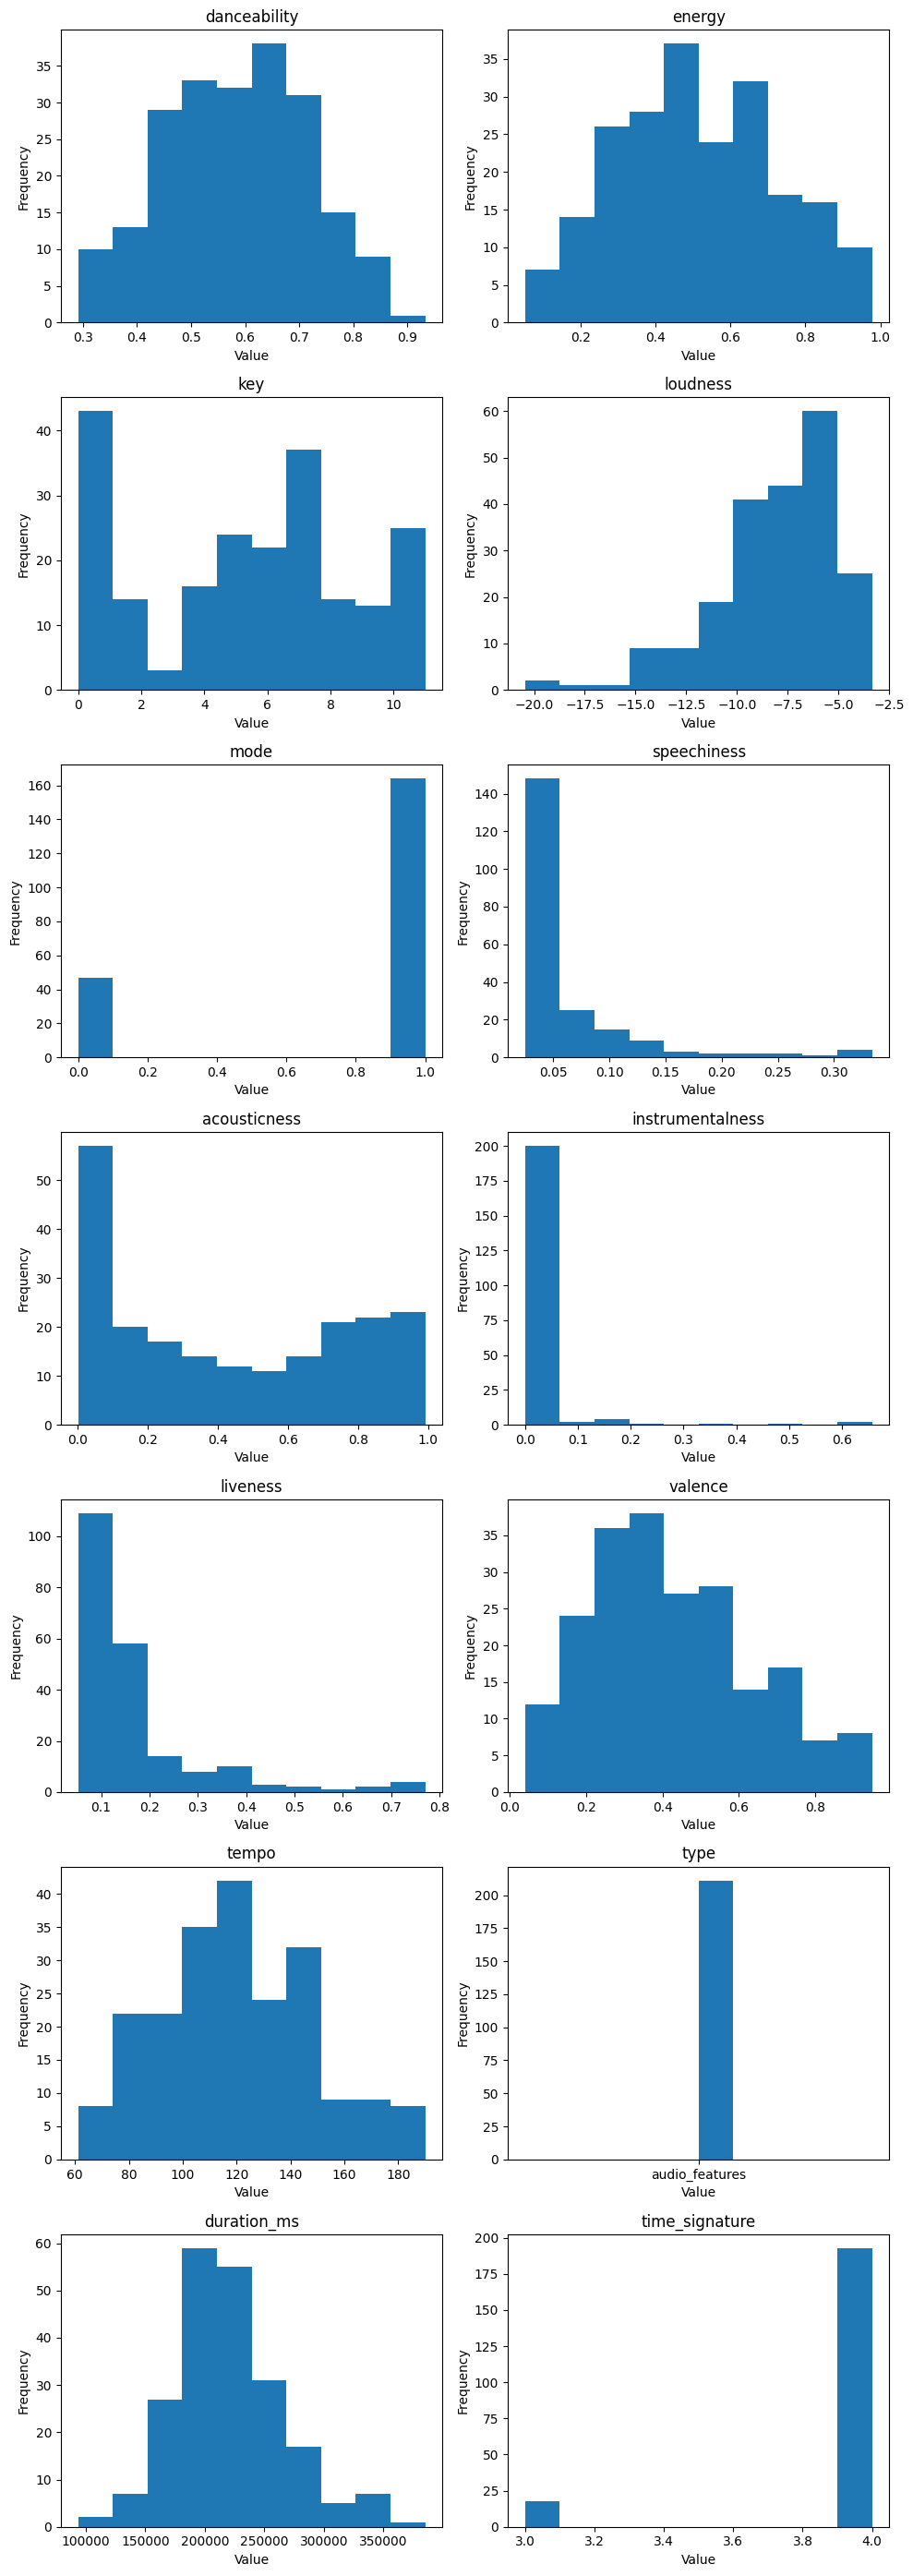

In [6]:
# TODO: data visualization on distribution of audio features
# TODO: data visualization on distribution of genres

features = track_features[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'duration_ms', 'time_signature']].columns

def plot_histograms(df, bins=10):
    num_features = len(df)
    num_rows = (num_features + 1) // 2
    fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 4 * num_rows))

    ax = ax.flatten()

    for i, feature in enumerate(features):
        ax[i].hist(track_features[feature], bins=bins)
        ax[i].set_title(feature)
        ax[i].set_xlabel('Value')
        ax[i].set_ylabel('Frequency')
    
    plt.tight_layout()

    plt.show()

plot_histograms(features)

In [35]:
features = artist_features[['genres']]
# plot_histograms()

Index(['artist_id', 'genres', 'name', 'popularity', 'is_missing_genre'], dtype='object')

In [8]:
# TODO: assign genres to each song based on their artist(s)
